In [1]:
import os
os.chdir("..")

In [3]:
from src import features as ft
from src import data_loader as dl

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
prices = pd.read_csv("data/raw_data/prices.csv", index_col="Date", parse_dates=True)
volumes = pd.read_csv("data/raw_data/volumes.csv", index_col="Date", parse_dates=True)
esg_scores = pd.read_csv("data/raw_data/esg_scores.csv", index_col=0)  
esg_scores = esg_scores.rename(columns={'ticker': 'Ticker'})

In [5]:
feature_df_long = ft.build_features(prices, volume=volumes, esg_scores=esg_scores)

In [6]:
feature_df_long.to_csv("data/processed/features_long.csv", index=False)

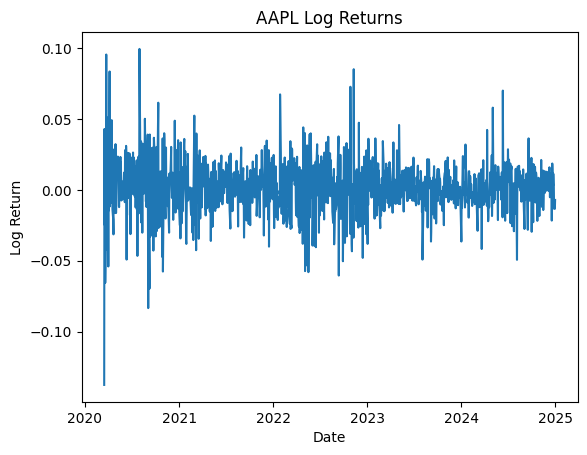

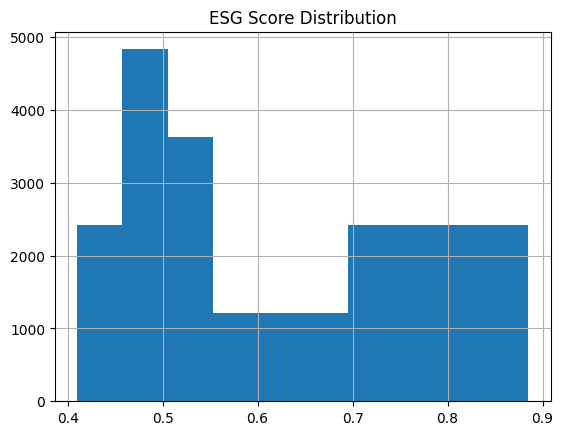

In [12]:
aapl = feature_df_long[feature_df_long['Ticker'] == 'AAPL'].copy()
aapl['log_return'] = np.log(aapl['price'] / aapl['price'].shift(1))

plt.plot(aapl['Date'], aapl['log_return'])
plt.title("AAPL Log Returns")
plt.xlabel("Date")
plt.ylabel("Log Return")
plt.show()

# ESG distribution
feature_df_long['esg_score'].hist(bins=10)
plt.title("ESG Score Distribution")
plt.show()